**Ujian Akhir Semester Introduction to AI (INF-A)**

Nama Anggota Kelompok:

1. Syifa Nur Nabila (2023071017)
2. Fikri Armia Fahmi (2023071018)

# 1. Load Dataset

In [46]:
# Import library
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Tampilkan 5 baris pertama
print("5 Baris Pertama:")
print(df.head()[:5])

# Statistik deskriptif
print("\nStatistik Dataset:")
print(df.describe())

5 Baris Pertama:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Statistik Dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000          

# 2. Preprocessing

In [47]:
# Hitung Missing Value
print("\nJumlah Missing Value:")
print(df.isnull().sum())


Jumlah Missing Value:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


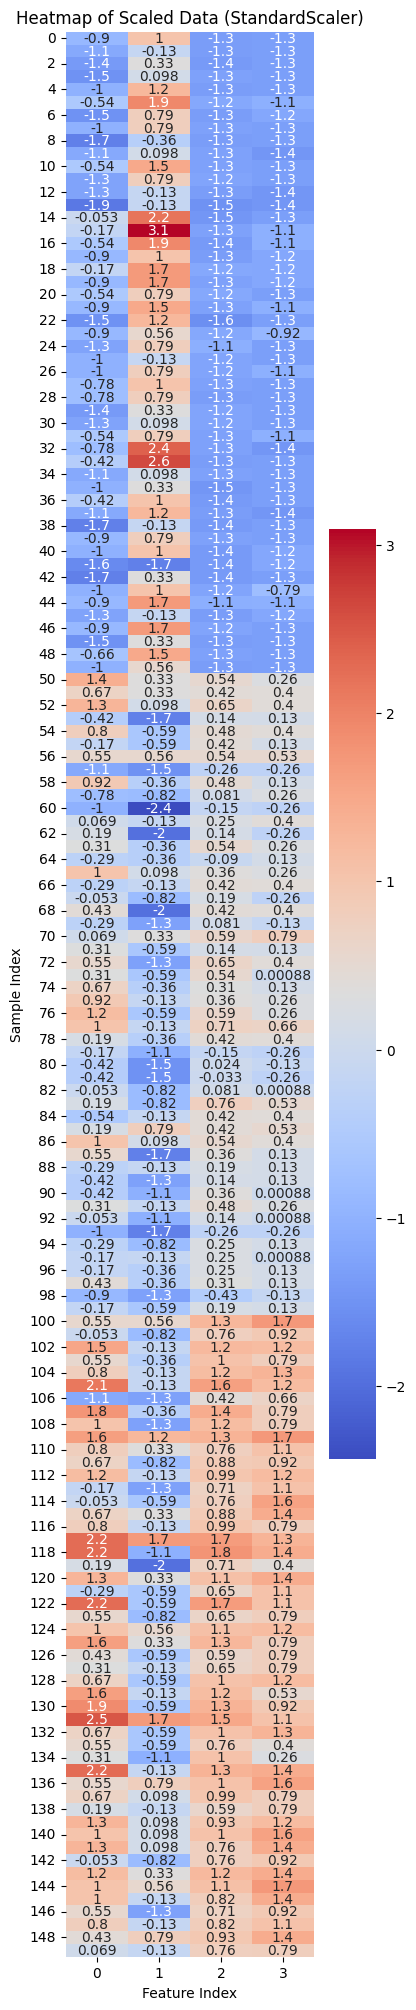

In [48]:
# Standardize all numerical features menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled = scaler.fit_transform(df)
df_scaled

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 25))
sns.heatmap(df_scaled, annot=True, cmap="coolwarm")
plt.title("Heatmap of Scaled Data (StandardScaler)")
plt.xlabel("Feature Index")
plt.ylabel("Sample Index")
plt.show()
# Penjelasan: Pada bagian ini, dilakukan standarisasi pada setiap numerik/value pada table, agar nilainya bisa disederhanakan

In [59]:
# Ambil 4 fitur untuk clustering (Semua)
X = df_scaled

# 3. Menerapkan Clustering Algorithms


Number of clusters = 2
Silhouette score = 0.5817500491982808

Number of clusters = 3
Silhouette score = 0.4630420362927048

Number of clusters = 4
Silhouette score = 0.38517417630641415

Number of clusters = 5
Silhouette score = 0.34551099599809465

Number of clusters = 6
Silhouette score = 0.33650883691913264

Number of clusters = 7
Silhouette score = 0.33227979307444294

Number of clusters = 8
Silhouette score = 0.33837645621227175

Number of clusters = 9
Silhouette score = 0.3507425819901971


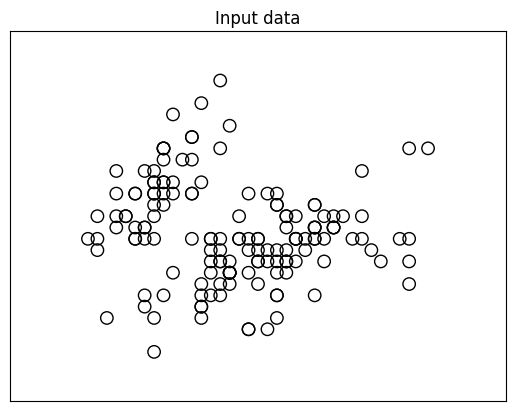

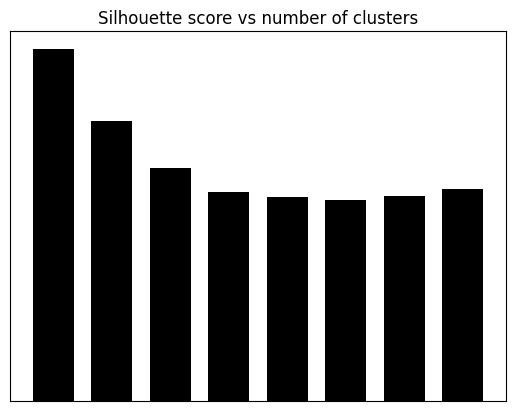


Optimal number of clusters = 2

Number of clusters (KMeans) = 2

Number of clusters (GMM) = 2


In [54]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans, estimate_bandwidth
from sklearn.mixture import GaussianMixture


# Tentukan jumlah cluster optimal dengan Silhouette Score
scores = []
values = np.arange(2, 10)

for num_clusters in values:
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    scores.append(score)
    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)

# Plot input data
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolors='none',
            edgecolors='black', s=80)
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Plot Silhouette Score
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')
plt.xticks(())
plt.yticks(())
plt.show()

# Ambil jumlah cluster terbaik
optimal_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', optimal_clusters)

# KMEANS
kmeans = KMeans(init='k-means++', n_clusters=optimal_clusters, n_init=10)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_
kmeans_n = len(np.unique(kmeans_labels))
print("\nNumber of clusters (KMeans) =", kmeans_n)

# GMM
gmm = GaussianMixture(n_components=optimal_clusters, random_state=0)
gmm_labels = gmm.fit_predict(X)
gmm_centers = gmm.means_
gmm_n = len(np.unique(gmm_labels))
print("\nNumber of clusters (GMM) =", gmm_n)


# 4. Visualisasi Cluster

In [55]:
from sklearn.decomposition import PCA
# Reduksi ke 2D untuk plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

centers_pca = PCA(n_components=2).fit_transform(kmeans.cluster_centers_)


Number of clusters (KMeans) = 2


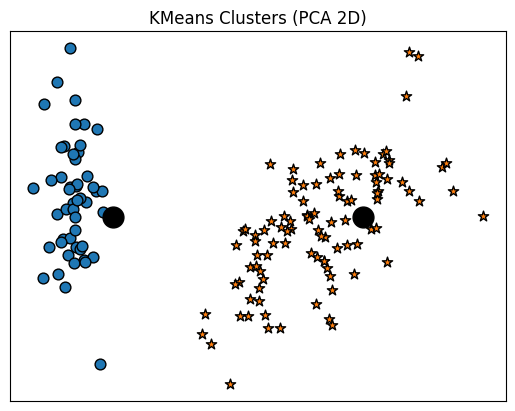

In [56]:
# Plot KMeans Clusters
plt.figure()
cmap = plt.get_cmap('tab10')
markers = 'o*xvs^<>+'

for i in range(optimal_clusters):
    plt.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1],
                color=cmap(i), marker=markers[i % len(markers)], s=60, edgecolor='black')

# Plot pusat cluster
for center in centers_pca:
    plt.plot(center[0], center[1], marker='o', markerfacecolor='black',
             markeredgecolor='black', markersize=15)

print("\nNumber of clusters (KMeans) =", kmeans_n)
plt.title('KMeans Clusters (PCA 2D)')
plt.xticks(())
plt.yticks(())
plt.show()


Number of clusters (GMM) = 2


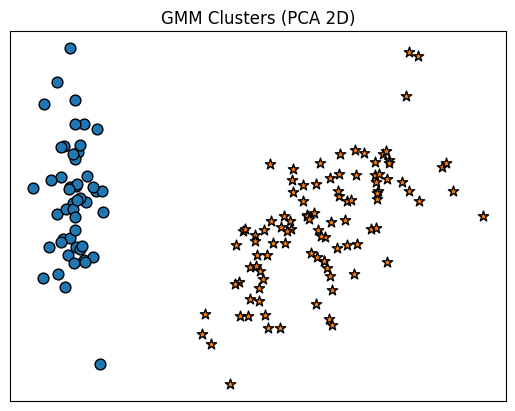

In [57]:
# Plot GMM Cluster
plt.figure()
for i in range(optimal_clusters):
    plt.scatter(X_pca[gmm_labels == i, 0], X_pca[gmm_labels == i, 1],
                color=cmap(i), marker=markers[i % len(markers)], s=60, edgecolor='black')

print("\nNumber of clusters (GMM) =", gmm_n)
plt.title('GMM Clusters (PCA 2D)')
plt.xticks(())
plt.yticks(())
plt.show()
